In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [66]:
df = pd.read_csv("city_day.csv")

In [101]:
# Keep only needed columns
features = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
target = 'AQI_Bucket'

# Filter relevant columns
df = df[['City','Datetime'] + features + [target]]

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,Severe
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,2.01,19.41,2.86,Satisfactory
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,19.07,10.19,9.63,Severe
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,9.31,11.65,9.39,Very Poor
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,6.04,12.74,9.59,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,Delhi,2024-12-31,371.2,61.7,14.6,130.7,159.1,45.9,7.02,76.4,40.0,7.99,5.71,0.36,Poor
18261,Mumbai,2024-12-31,180.2,259.3,181.9,50.7,135.7,22.4,8.85,12.2,147.3,13.93,7.15,2.08,Satisfactory
18262,Chennai,2024-12-31,188.6,434.4,68.8,126.1,142.7,47.0,8.30,50.2,128.6,6.98,6.71,2.10,Good
18263,Kolkata,2024-12-31,343.0,458.6,106.7,108.3,137.8,22.6,2.11,71.4,175.8,4.12,11.68,0.88,Good


In [69]:
cities = df['City'].unique()
city_dfs = {city: df[df['City'] == city].reset_index(drop=True) for city in cities}


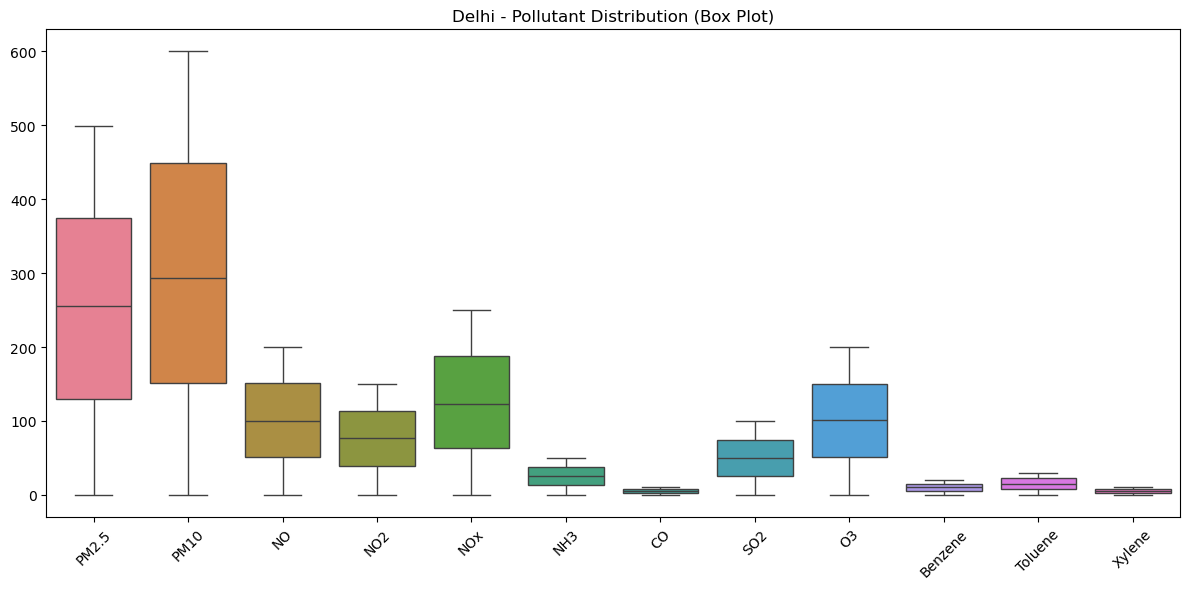

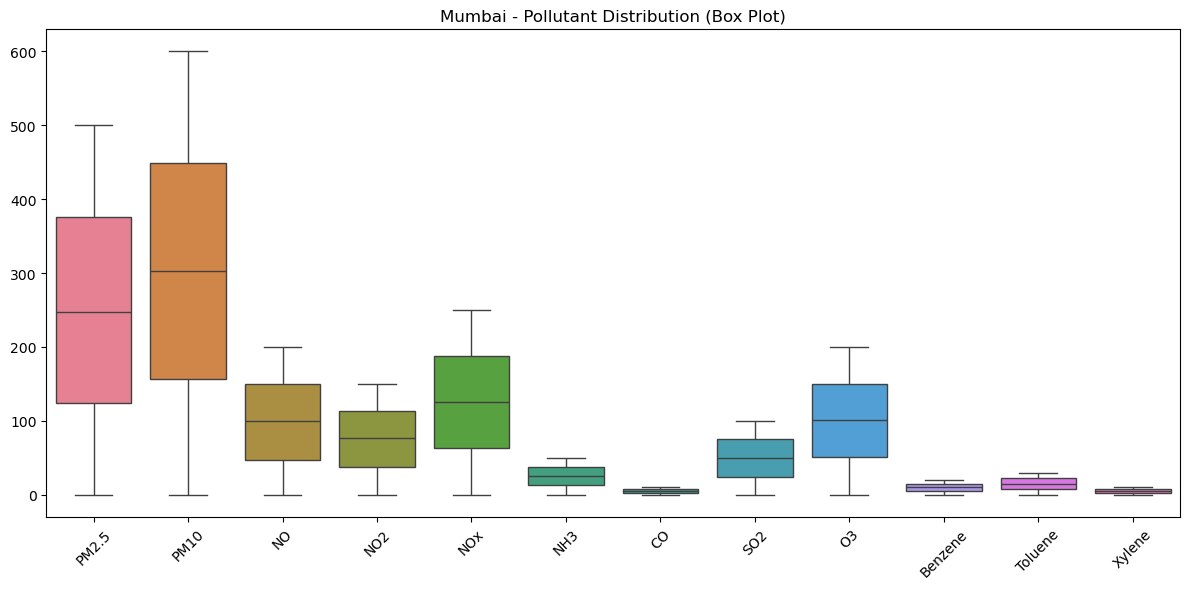

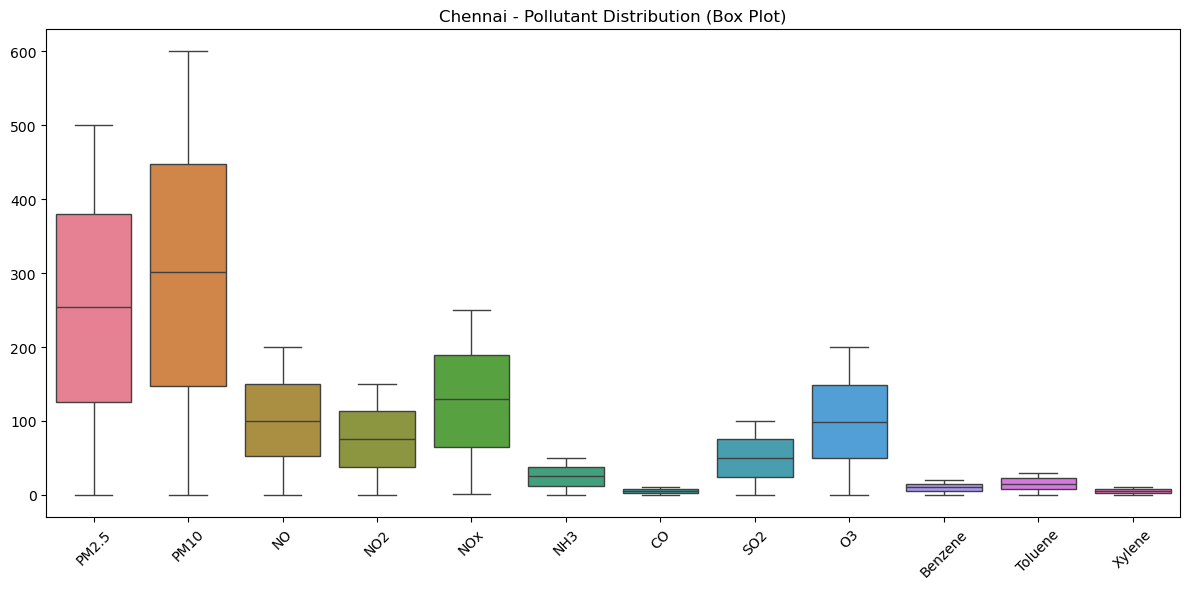

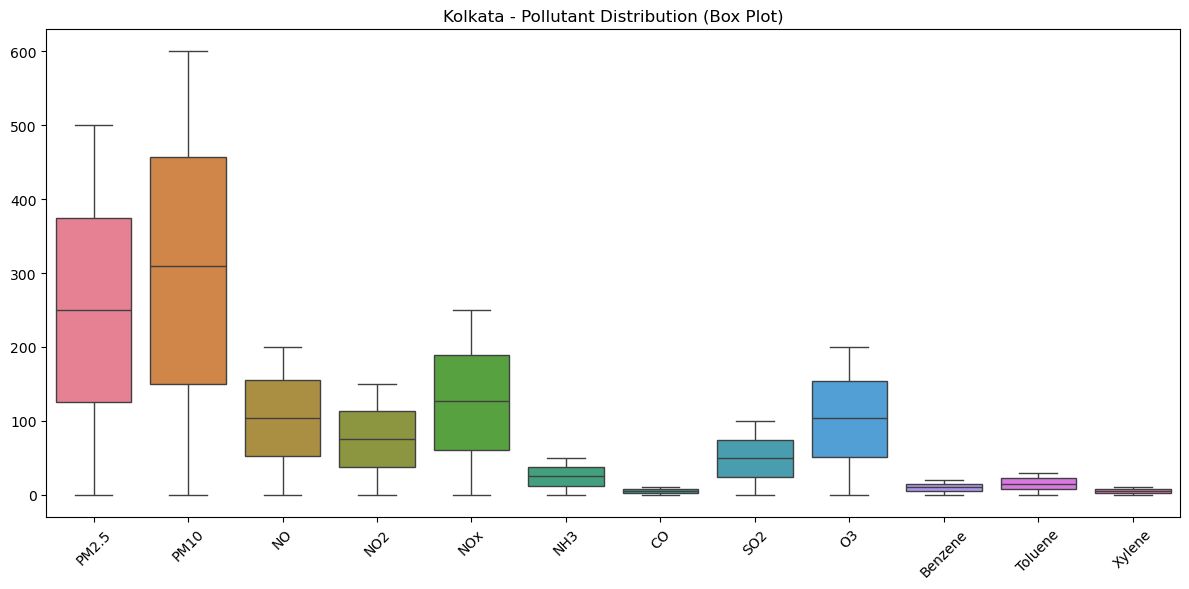

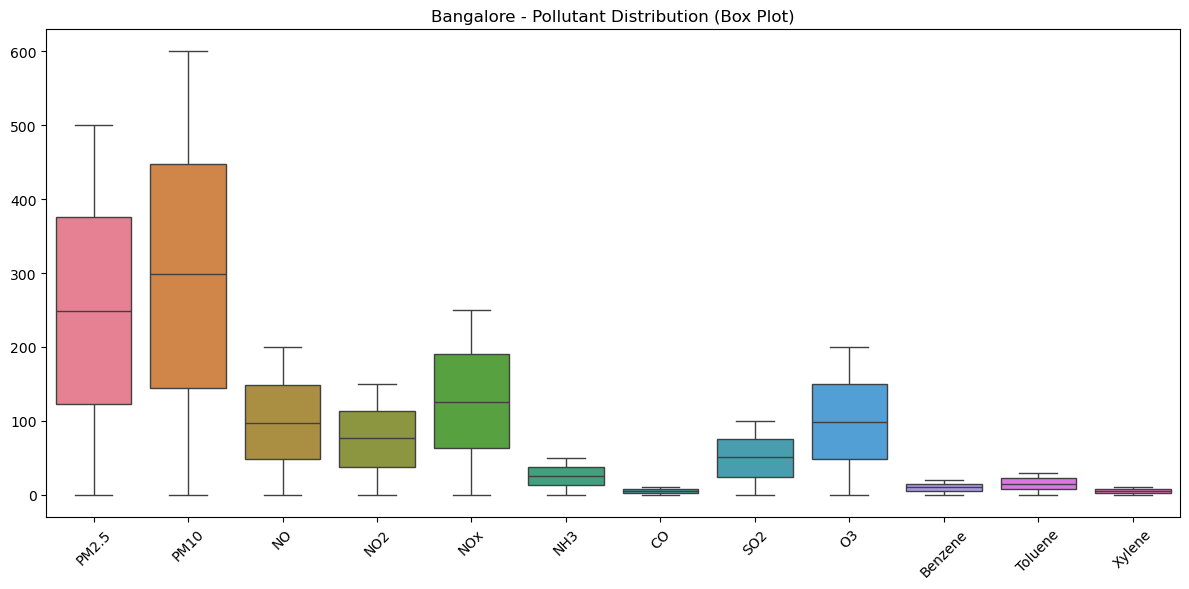

In [70]:
for city, data in city_dfs.items():
    plt.figure(figsize=(12,6))
    sns.boxplot(data=data[features])
    plt.title(f"{city} - Pollutant Distribution (Box Plot)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [71]:
city_dfs['Delhi']      # shows Delhi data

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,Severe
1,Delhi,2015-01-02,344.2,173.2,179.8,128.4,156.1,15.6,6.28,7.5,9.4,0.55,15.60,2.45,Satisfactory
2,Delhi,2015-01-03,473.9,20.1,12.7,102.7,244.7,42.5,0.04,29.8,42.0,1.87,15.11,2.41,Satisfactory
3,Delhi,2015-01-04,32.4,414.8,198.1,25.6,218.2,13.2,2.47,50.4,80.2,7.70,12.46,0.57,Satisfactory
4,Delhi,2015-01-05,312.8,155.8,143.1,106.8,6.1,4.9,4.04,2.0,101.3,13.41,1.66,4.46,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,Delhi,2024-12-27,319.0,527.9,85.2,54.3,240.6,24.0,7.45,7.0,156.0,2.14,29.11,6.10,Satisfactory
3649,Delhi,2024-12-28,377.0,567.7,89.8,93.8,199.5,13.2,0.66,18.4,187.7,17.82,6.96,9.25,Severe
3650,Delhi,2024-12-29,70.4,96.5,81.7,125.6,131.3,27.2,1.20,6.6,4.4,8.60,10.23,1.46,Poor
3651,Delhi,2024-12-30,85.7,338.0,158.3,49.6,78.1,26.6,9.73,88.4,2.7,7.31,26.75,8.08,Moderate


In [72]:
city_dfs['Mumbai']     # shows Mumbai data

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
0,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,2.01,19.41,2.86,Satisfactory
1,Mumbai,2015-01-02,59.2,335.7,182.1,143.8,207.3,44.8,5.81,6.4,145.5,7.99,29.18,7.11,Good
2,Mumbai,2015-01-03,191.0,200.5,21.5,141.3,235.8,8.6,8.54,89.0,129.8,10.37,4.99,8.19,Poor
3,Mumbai,2015-01-04,177.3,30.8,164.9,149.3,83.5,37.4,8.63,30.7,75.7,3.54,16.20,6.57,Severe
4,Mumbai,2015-01-05,335.4,582.7,144.2,37.2,130.3,22.9,6.83,91.6,30.9,8.89,8.25,3.77,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,Mumbai,2024-12-27,486.4,571.6,124.1,117.2,44.5,22.5,2.29,62.4,122.8,19.17,13.22,0.50,Good
3649,Mumbai,2024-12-28,392.5,238.3,6.1,32.9,160.1,18.3,1.58,74.6,123.5,10.32,27.86,6.64,Moderate
3650,Mumbai,2024-12-29,105.6,12.4,164.9,70.6,58.7,47.9,9.58,62.2,99.3,19.63,1.87,6.92,Good
3651,Mumbai,2024-12-30,425.5,142.9,156.1,101.0,124.2,8.3,2.82,51.0,108.7,18.70,10.21,7.01,Poor


In [73]:
city_dfs['Chennai']    # etc.

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
0,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,19.07,10.19,9.63,Severe
1,Chennai,2015-01-02,418.9,573.8,23.8,17.5,43.0,22.5,4.49,9.5,198.7,1.89,17.93,2.91,Satisfactory
2,Chennai,2015-01-03,86.6,531.8,99.1,92.8,62.4,49.8,1.12,9.9,45.5,4.02,1.55,7.48,Moderate
3,Chennai,2015-01-04,417.0,361.9,118.5,145.1,120.8,28.9,6.22,11.4,14.4,5.14,22.78,7.81,Good
4,Chennai,2015-01-05,123.3,126.0,137.4,140.7,214.5,20.8,9.55,68.7,166.5,14.66,21.22,6.71,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,Chennai,2024-12-27,28.1,554.0,170.5,100.8,68.8,22.0,8.77,49.2,76.3,9.86,13.23,8.22,Moderate
3649,Chennai,2024-12-28,273.9,30.0,38.7,98.1,201.3,26.6,0.53,33.1,122.4,18.48,5.22,4.00,Moderate
3650,Chennai,2024-12-29,73.0,1.6,150.5,139.9,207.4,8.6,4.90,24.0,129.2,5.03,3.07,3.54,Poor
3651,Chennai,2024-12-30,49.7,71.6,63.6,76.1,38.5,48.4,9.55,61.3,67.3,2.48,27.15,9.88,Very Poor


In [74]:
city_dfs['Kolkata']

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
0,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,9.31,11.65,9.39,Very Poor
1,Kolkata,2015-01-02,329.8,599.3,139.1,34.0,75.2,24.1,3.63,63.4,111.2,8.95,28.51,1.88,Very Poor
2,Kolkata,2015-01-03,393.0,422.5,28.9,112.1,149.9,40.6,5.72,3.7,60.8,2.02,16.70,0.47,Severe
3,Kolkata,2015-01-04,392.0,70.4,33.6,127.9,11.8,6.7,5.02,51.4,105.6,4.25,23.96,4.65,Severe
4,Kolkata,2015-01-05,298.2,515.0,86.7,101.8,156.6,35.3,4.17,19.4,197.7,3.23,19.19,1.90,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,Kolkata,2024-12-27,416.6,41.5,95.2,14.3,182.1,3.9,1.36,2.6,185.0,17.04,26.81,6.15,Good
3649,Kolkata,2024-12-28,427.5,481.7,152.7,73.4,101.9,22.6,9.76,83.7,83.0,19.73,26.86,6.36,Severe
3650,Kolkata,2024-12-29,196.2,428.7,189.9,28.2,142.8,21.0,4.89,30.9,136.4,2.14,20.28,7.56,Satisfactory
3651,Kolkata,2024-12-30,483.3,218.0,78.4,23.8,5.8,4.9,0.30,81.3,26.7,11.18,18.52,8.80,Very Poor


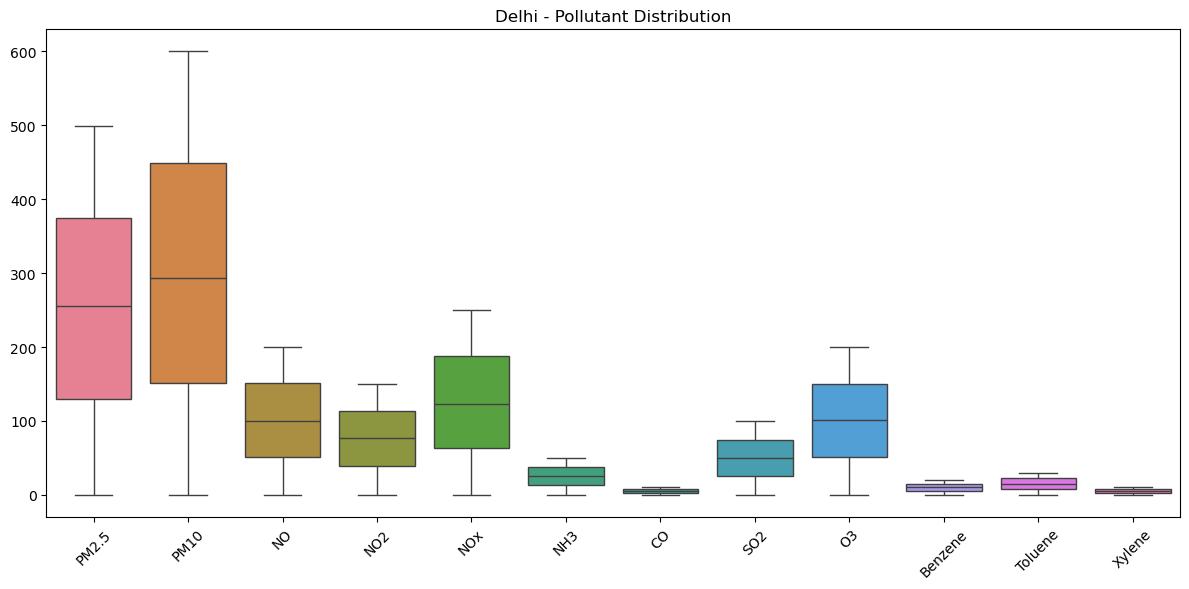

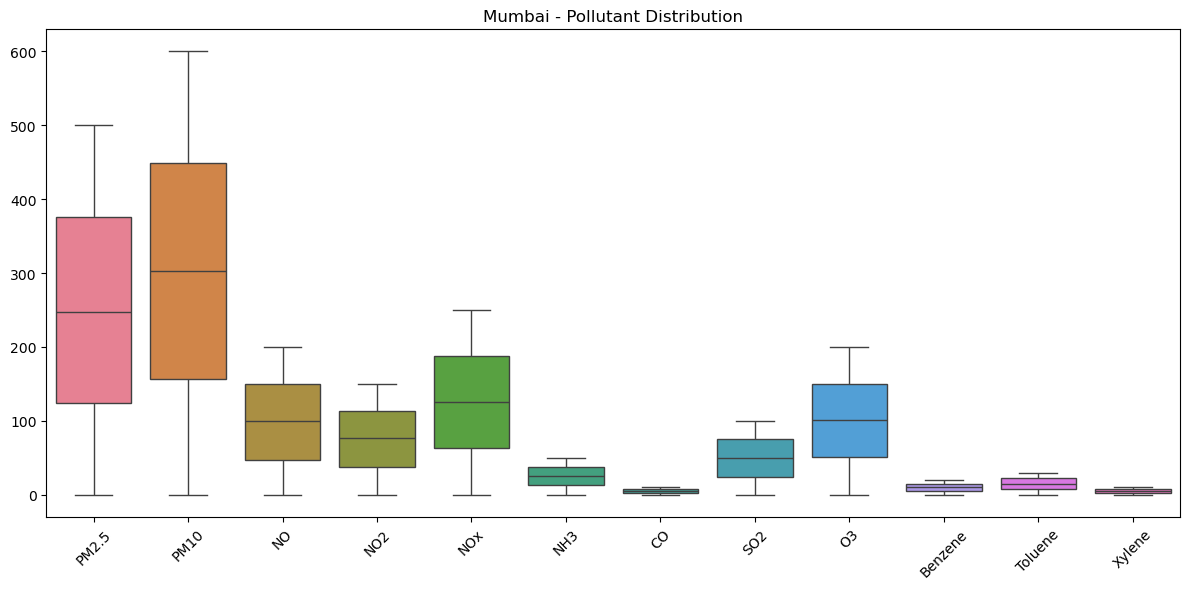

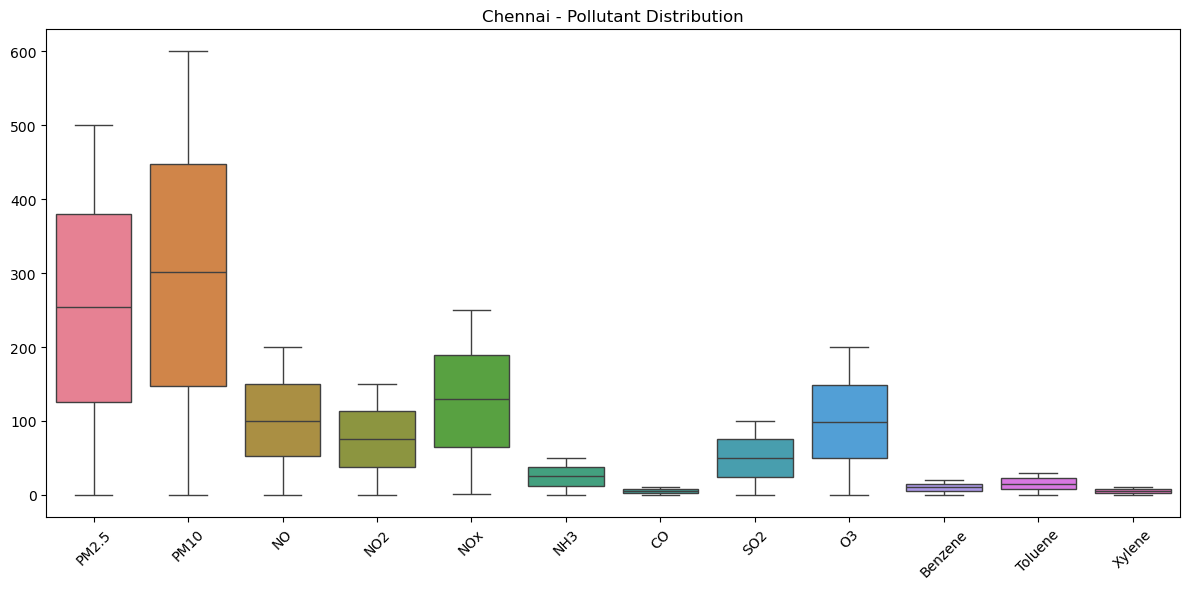

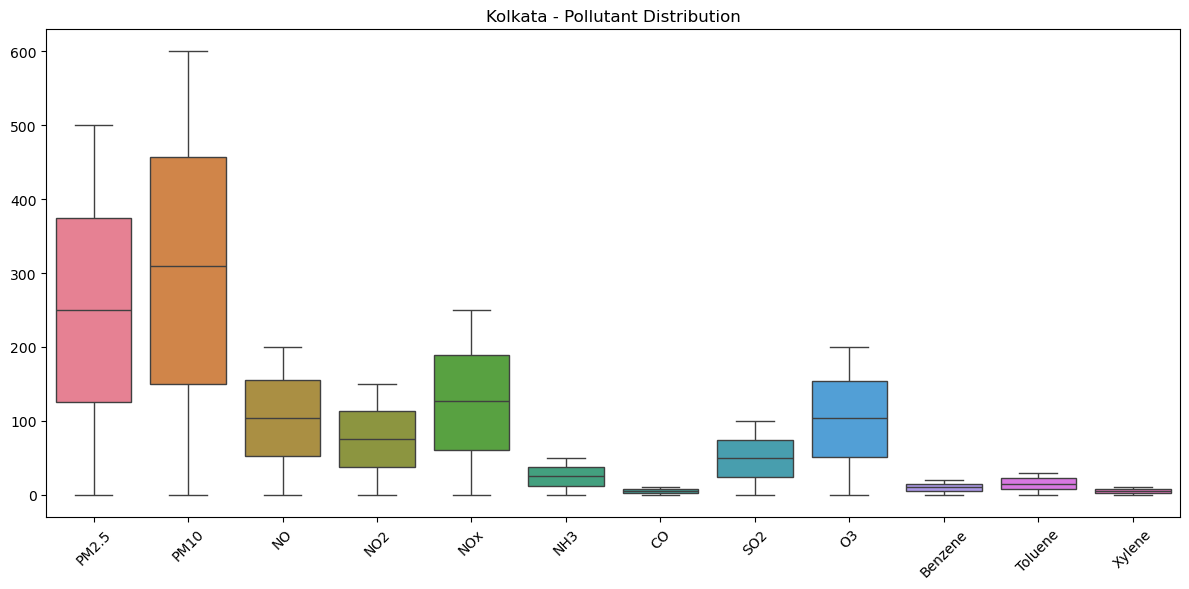

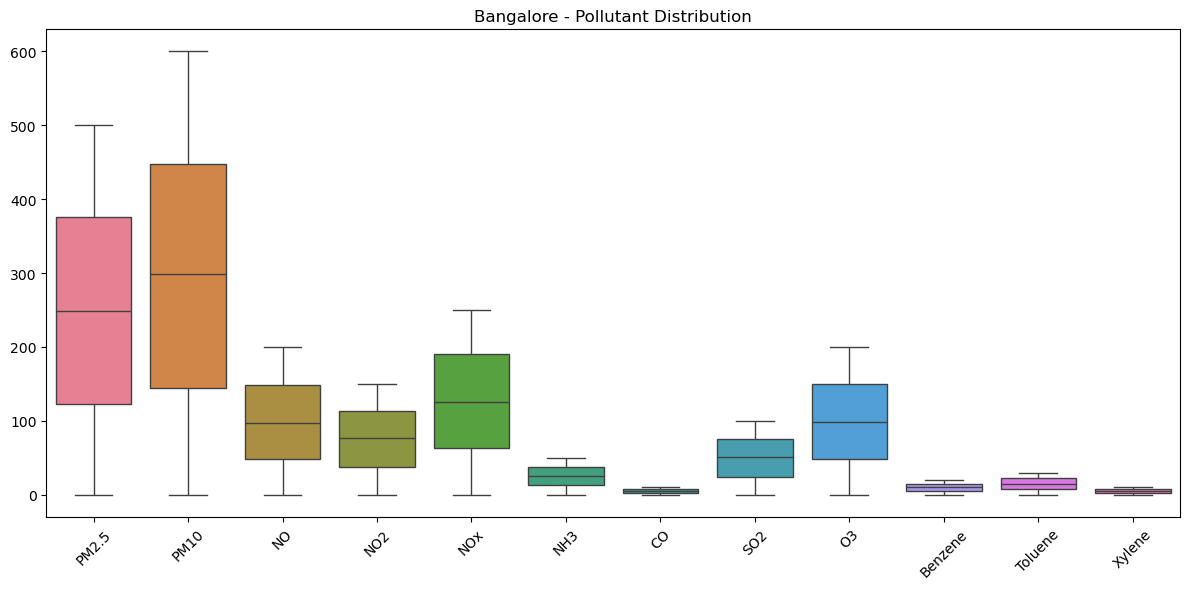

In [75]:
for city, data in city_dfs.items():
    plt.figure(figsize=(12,6))
    sns.boxplot(data=data.drop(columns=['City', 'Datetime']))
    plt.title(f"{city} - Pollutant Distribution")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




=== Delhi ===
Accuracy: 0.16

Classification Report:
              precision    recall  f1-score   support

        Good       0.16      0.18      0.17       121
    Moderate       0.11      0.10      0.11       117
        Poor       0.19      0.17      0.18       119
Satisfactory       0.15      0.14      0.15       122
      Severe       0.14      0.15      0.15       127
   Very Poor       0.18      0.20      0.19       125

    accuracy                           0.16       731
   macro avg       0.16      0.16      0.16       731
weighted avg       0.16      0.16      0.16       731



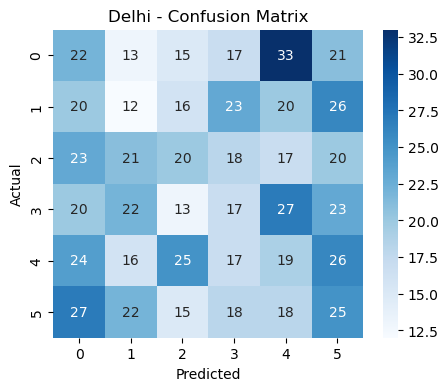


=== Mumbai ===
Accuracy: 0.16

Classification Report:
              precision    recall  f1-score   support

        Good       0.14      0.21      0.17       126
    Moderate       0.17      0.20      0.18       118
        Poor       0.10      0.06      0.07       124
Satisfactory       0.19      0.19      0.19       129
      Severe       0.17      0.16      0.16       121
   Very Poor       0.14      0.12      0.13       113

    accuracy                           0.16       731
   macro avg       0.15      0.16      0.15       731
weighted avg       0.15      0.16      0.15       731



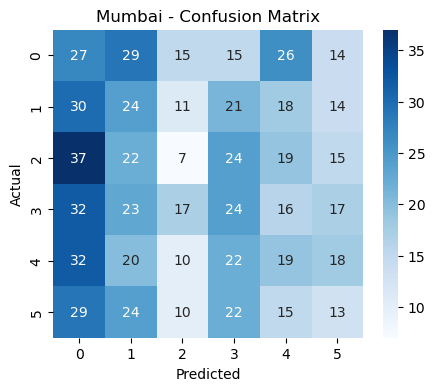


=== Chennai ===
Accuracy: 0.17

Classification Report:
              precision    recall  f1-score   support

        Good       0.19      0.27      0.22       128
    Moderate       0.25      0.12      0.17       114
        Poor       0.15      0.15      0.15       117
Satisfactory       0.16      0.21      0.18       126
      Severe       0.15      0.15      0.15       123
   Very Poor       0.17      0.14      0.15       123

    accuracy                           0.17       731
   macro avg       0.18      0.17      0.17       731
weighted avg       0.18      0.17      0.17       731



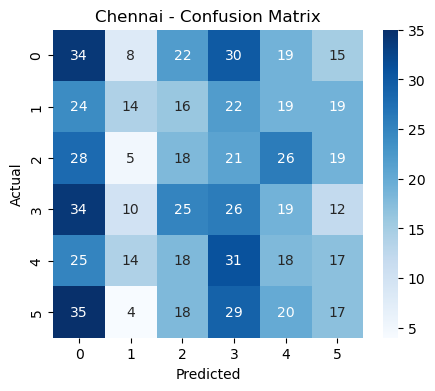


=== Kolkata ===
Accuracy: 0.16

Classification Report:
              precision    recall  f1-score   support

        Good       0.12      0.14      0.13       123
    Moderate       0.15      0.23      0.18       125
        Poor       0.21      0.17      0.19       120
Satisfactory       0.17      0.15      0.16       118
      Severe       0.21      0.19      0.20       124
   Very Poor       0.09      0.07      0.08       121

    accuracy                           0.16       731
   macro avg       0.16      0.16      0.16       731
weighted avg       0.16      0.16      0.16       731



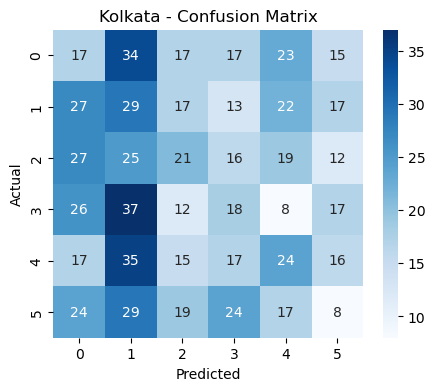


=== Bangalore ===
Accuracy: 0.17

Classification Report:
              precision    recall  f1-score   support

        Good       0.16      0.19      0.17       122
    Moderate       0.20      0.16      0.17       116
        Poor       0.16      0.17      0.16       123
Satisfactory       0.14      0.14      0.14       124
      Severe       0.20      0.21      0.20       130
   Very Poor       0.19      0.16      0.18       116

    accuracy                           0.17       731
   macro avg       0.17      0.17      0.17       731
weighted avg       0.17      0.17      0.17       731



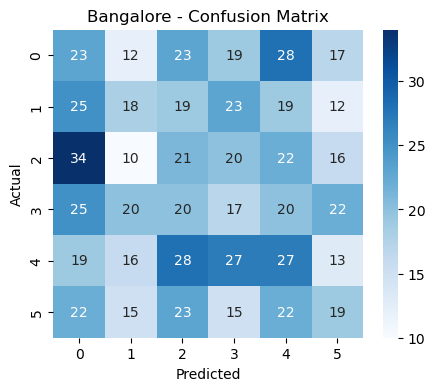

In [95]:
results = []

for city, data in city_dfs.items():
    X = data[features]
    y = data[target]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=100)
    knn.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = knn.predict(X_test_scaled)
    
    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    results.append({'City': city, 'Accuracy': acc})
    
    print(f"\n=== {city} ===")
    print(f"Accuracy: {acc:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{city} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()




In [97]:
# Combine results
results_df = pd.DataFrame(results)
print("\nOverall City-wise Accuracy:")
results_df


Overall City-wise Accuracy:


,City,Accuracy
0,Delhi,0.157319
1,Mumbai,0.155951
2,Chennai,0.173735
3,Kolkata,0.160055
4,Bangalore,0.170999


In [78]:
df

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI_Bucket
0,Delhi,2015-01-01,153.3,241.7,182.9,33.0,81.3,38.5,1.87,64.5,83.6,18.93,20.81,8.32,Severe
1,Mumbai,2015-01-01,70.5,312.7,195.0,42.0,122.5,31.5,7.22,83.8,108.0,2.01,19.41,2.86,Satisfactory
2,Chennai,2015-01-01,174.1,275.4,56.2,68.8,230.9,28.5,8.56,60.8,43.9,19.07,10.19,9.63,Severe
3,Kolkata,2015-01-01,477.2,543.9,14.1,76.4,225.9,45.6,2.41,42.1,171.1,9.31,11.65,9.39,Very Poor
4,Bangalore,2015-01-01,171.6,117.7,123.3,12.4,61.9,49.7,1.26,79.7,164.3,6.04,12.74,9.59,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18260,Delhi,2024-12-31,371.2,61.7,14.6,130.7,159.1,45.9,7.02,76.4,40.0,7.99,5.71,0.36,Poor
18261,Mumbai,2024-12-31,180.2,259.3,181.9,50.7,135.7,22.4,8.85,12.2,147.3,13.93,7.15,2.08,Satisfactory
18262,Chennai,2024-12-31,188.6,434.4,68.8,126.1,142.7,47.0,8.30,50.2,128.6,6.98,6.71,2.10,Good
18263,Kolkata,2024-12-31,343.0,458.6,106.7,108.3,137.8,22.6,2.11,71.4,175.8,4.12,11.68,0.88,Good
